# Temperature Prediction

## Objective
Predict the **temperature** based on humidity data.


## Dataset Overview
The dataset contains hourly or daily readings of humidity and temperature.


## Workflow
1. Load the dataset  
2. Explore and clean the data  
3. Train a regression model  
4. Evaluate predictions


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the dataset
df = pd.read_csv("humidity.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701548 entries, 0 to 701547
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sensor_id    701548 non-null  int64  
 1   lat          701548 non-null  float64
 2   lon          701548 non-null  float64
 3   pressure     701548 non-null  float64
 4   temperature  701548 non-null  float64
 5   humidity     701548 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 32.1 MB


,sensor_id,lat,lon,pressure,temperature,humidity
0,2266,42.738,23.272,95270.27,23.46,62.48
1,2292,42.663,23.273,94355.83,23.06,59.46
2,3096,42.700,23.360,95155.81,26.53,44.38
3,3428,42.624,23.406,94679.57,28.34,38.28
4,3472,42.669,23.318,94327.88,26.31,46.37


## Exploratory Data Analysis


In [4]:
# Check for missing values
print(df.isnull().sum())
print(df.duplicated().sum())

sensor_id      0
lat            0
lon            0
pressure       0
temperature    0
humidity       0
dtype: int64
4035


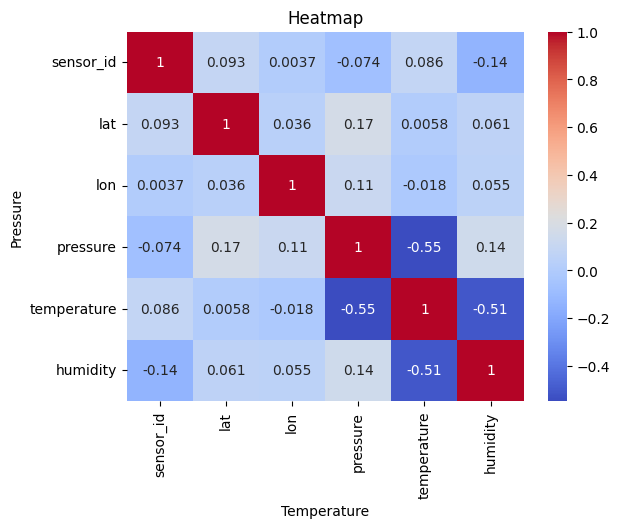

['sensor_id', 'lat', 'lon', 'pressure', 'temperature', 'humidity']

In [5]:
# Display summary statistics
sns.heatmap(df.corr(),annot = True, cmap = 'coolwarm')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.title('Heatmap')
plt.show()
df.columns.tolist()

## Data Preprocessing

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['sensor_id','lat','lon','pressure','temperature','humidity']] = scaler.fit_transform(df[['sensor_id','lat','lon','pressure','temperature','humidity']])

## Defining X & Y
x = df.drop('temperature',axis = 1)
y = df['temperature']

# Train-test split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8)

## Model Training

In [21]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 3
model = make_pipeline(PolynomialFeatures(degree = degree),LinearRegression())

model.fit(x_train,y_train)
y_pred = model.predict(x_test)

## Evaluation


In [22]:
# Evaluate model performance
mse = mean_squared_error(y_test,y_pred)
print("MSE:",mse)

r2 =  r2_score(y_test,y_pred)
print("R2:",r2)

MSE: 0.04642943710590347
R2: 0.9549192700601187


## Conclusion
- A simple linear regression model was used to predict temperature from humidity.  
- Consider using polynomial regression or time-series models for more complex patterns.
